# Tugas Besar 1 IF3270 Pembelajaran Mesin Feedforward Neural Network

|   NIM    |            NAMA            |
| :------: | :------------------------: |
| 13522037 |    Farhan Nafis Rayhan     |
| 13522091 | Raden Francisco Trianto B. |


## Import Dataset MNIST

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

X: np.ndarray  # input
y: np.ndarray  # target

# Load data from https://www.openml.org/search?type=data&sort=runs&id=554   
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

 
# MNIST: dataset of 28x28 pixel images of handwritten digits (0-9)
# Input: vector of 784 pixels (28x28)
# Target: number 0-9

In [2]:
X.shape, y.shape

((70000, 784), (70000,))

## Import Model

In [3]:
import sys
import os

# Get the absolute path of the src directory
sys.path.append(os.path.abspath('../')) 

from model.matrix import Matrix
from model.nn import Neuron, Layer, MLP
from model.ffnn import FFNN
from graph.visualize import draw_dot, draw_ffnn

# Limit to 500 samples

In [4]:
X, y = X[:2500, 330:360], y[:2500]
# X, y = X[:5, :3], y[:5]

In [5]:
MX = Matrix(X)
MX

Matrix with 2500 rows and 30 cols
Sample:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 190, 253, 70, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 178, 252, 240, 71, 19, 28, 0, 0, 0, 0, 0, 0, 253, 252, 195, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 159, 254, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 163, 254, 216, 16, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 205, 253, 251, 126, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 126, 253, 247, 176, 9, 0, 0, 8, 78, 245, 253, 129, 0, 0, 0, 0, 0]

In [6]:
MXT = MX.transpose()
MXT

Matrix with 30 rows and 2500 cols
Sample:
[0, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0, 0, 199, 0, 0, 103, 0, 0, 0, 0, 0, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 116, 71, 0, 0, 0, 94, 0, 0, 0, 229, 0, 0, 142, 36, 0, 0, 0, 170, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 170, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 253, 0, 0, 221, 0, 0, 252, 0, 0, 0, 26, 253, 0, 127, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 169, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 251, 0, 252, 0, 0, 0, 117, 0, 0, 0, 0, 0, 0, 0, 198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 117, 0, 0, 234, 253, 0, 252, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92, 0, 131, 0, 0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 131, 0, 0, 252, 0, 0, 0, 211, 0, 0, 0, 0, 0, 0, 179, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 252, 96,

In [7]:
n = Neuron(5)
n

Neuron(nin=5, activation=relu)

In [8]:
l = Layer(5, 16)
l

Layer of 16 Neuron: [
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)]

In [9]:
nn = MLP(5, [8, 8, 1], "relu")
nn

MLP of 3 Layers [
	Layer of 8 Neuron: [
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)
	Neuron(nin=5, activation=relu)]
	Layer of 8 Neuron: [
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)
	Neuron(nin=8, activation=relu)]
	Layer of 1 Neuron: [
	Neuron(nin=8, activation=linier)]]

In [10]:
ffnn = FFNN(X, y, [4, 3], loss="mse", active=["sigmoid", "relu", "linier"])
ffnn

Fully Connected Feed Forward Neural Network
> X = 2500 x 30
> y = 2500 x 1
> MLP of 3 Layers [
	Layer of 4 Neuron: [
	Neuron(nin=30, activation=sigmoid)
	Neuron(nin=30, activation=sigmoid)
	Neuron(nin=30, activation=sigmoid)
	Neuron(nin=30, activation=sigmoid)]
	Layer of 3 Neuron: [
	Neuron(nin=4, activation=relu)
	Neuron(nin=4, activation=relu)
	Neuron(nin=4, activation=relu)]
	Layer of 1 Neuron: [
	Neuron(nin=3, activation=linier)]]

In [11]:
f"Amount of param: {len(ffnn.parameters())}"

'Amount of param: 143'

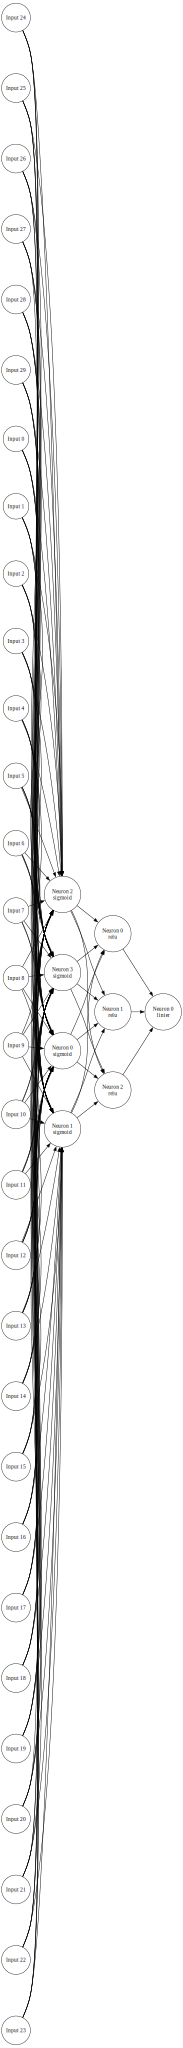

In [ ]:
draw_ffnn(ffnn)

In [13]:
# ffnn.backpropagation(loss)
# draw_dot(loss)

In [14]:
# loss = ffnn.training(50, 0.01, 1, 1)
# draw_dot(loss)

In [15]:
loss = ffnn.training(50, 0.01, 10, 1)

  0%|          | 0/10 [00:00<?, ?it/s]

Starting Epoch 0


 10%|█         | 1/10 [00:22<03:22, 22.53s/it]

Epoch 0 Done training
Training Loss 28.38
Validation Loss 27.974695839999885

Starting Epoch 1


 20%|██        | 2/10 [00:45<03:03, 22.92s/it]

Epoch 1 Done training
Training Loss 27.563780639999997
Validation Loss 27.185815662656047

Starting Epoch 2


 30%|███       | 3/10 [01:06<02:32, 21.72s/it]

Epoch 2 Done training
Training Loss 26.779883566655986
Validation Loss 26.42807747149646

Starting Epoch 3


 40%|████      | 4/10 [01:25<02:06, 21.02s/it]

Epoch 3 Done training
Training Loss 26.02702881741641
Validation Loss 25.700249997244942

Starting Epoch 4


 50%|█████     | 5/10 [01:53<01:57, 23.41s/it]

Epoch 4 Done training
Training Loss 25.30398711624673
Validation Loss 25.001150689821745

Starting Epoch 5


 60%|██████    | 6/10 [02:28<01:49, 27.48s/it]

Epoch 5 Done training
Training Loss 24.609577866443356
Validation Loss 24.32964378984306

Starting Epoch 6


 70%|███████   | 7/10 [03:02<01:28, 29.57s/it]

Epoch 6 Done training
Training Loss 23.942667222932197
Validation Loss 23.684638476476774

Starting Epoch 7


 80%|████████  | 8/10 [03:35<01:01, 30.69s/it]

Epoch 7 Done training
Training Loss 23.302166240904086
Validation Loss 23.065087088625454

Starting Epoch 8


 90%|█████████ | 9/10 [04:01<00:29, 29.11s/it]

Epoch 8 Done training
Training Loss 22.6870290977643
Validation Loss 22.469983416536852

Starting Epoch 9


100%|██████████| 10/10 [04:32<00:00, 27.25s/it]

Epoch 9 Done training
Training Loss 22.096251385492824
Validation Loss 21.898361061050394

